In [1]:
import pandas as pd
import numpy as np

In [2]:
panda = pd.read_csv('../pandas/Pokemon.csv')

#1 Series

In [3]:
#===
#Series
#s = pd.Series(data , index=index)

NameError: name 'data' is not defined

In [4]:
#ndarray constract
s = pd.Series(np.random.randn(5) , index = ['a' , 'b' , 'c' , 'd' , 'e'])

In [5]:
s

a   -0.696096
b    0.140841
c    1.726179
d   -2.596317
e   -0.055187
dtype: float64

In [6]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [7]:
#不认为指定index时
#pandas的索引可能出现重复值
pd.Series(np.random.randn(5))

0    0.532948
1   -0.202167
2   -0.246709
3    0.641984
4    0.005560
dtype: float64

In [8]:
#dict construct
d = {'a':0. , 'b':1. , 'c':2.}
pd.Series(d)

a    0.0
b    1.0
c    2.0
dtype: float64

In [9]:
pd.Series(d , index = ['b','c','d','a'])
#NaN是缺失值的标记符号

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

In [10]:
pd.Series(5. , index = ['a,','b']) #data为标量时 index必须指定

a,    5.0
b     5.0
dtype: float64

series is like ndarray

In [11]:
#Series也可以做大多数numpy函数的参数
s[0]

-0.69609598861859434

In [12]:
s[s>s.median()]

b    0.140841
c    1.726179
dtype: float64

In [13]:
s[[4,2,1]] # 返回tuple指定的index的值

e   -0.055187
c    1.726179
b    0.140841
dtype: float64

In [18]:
s

a   -0.696096
b    0.140841
c    1.726179
d   -2.596317
e   -0.055187
dtype: float64

In [19]:
np.exp(s)

a    0.498528
b    1.151242
c    5.619144
d    0.074548
e    0.946309
dtype: float64

In [17]:
#series is like dict
#就当成一个dict使用就ok

In [24]:
s['a']

-0.69609598861859434

In [25]:
#还可以认为改变值
s['a'] =52
s

a    52.000000
b     0.140841
c     1.726179
d    -2.596317
e    -0.055187
dtype: float64

In [26]:
'a' in s

True

In [27]:
'f' in s

False

In [28]:
s['f']

KeyError: 'f'

In [29]:
s.get('r' , default=np.nan)

nan

In [31]:
#series可以直接操作

In [32]:
s+s

a    104.000000
b      0.281683
c      3.452359
d     -5.192634
e     -0.110373
dtype: float64

In [33]:
s*2

a    104.000000
b      0.281683
c      3.452359
d     -5.192634
e     -0.110373
dtype: float64

In [34]:
s[1:]+s[:-1]

a         NaN
b    0.281683
c    3.452359
d   -5.192634
e         NaN
dtype: float64

In [41]:
s[1:] + s # + - * /都可以
#dropna函数可以删除缺少数据的标签

a         NaN
b    0.281683
c    3.452359
d   -5.192634
e   -0.110373
dtype: float64

In [45]:
s = pd.Series(np.random.randn(5) , name='something')
#series的name 有时候可以自动获得 比如从dataframe结构中

In [46]:
s

0   -1.485615
1   -0.547103
2   -0.643320
3    0.292246
4    0.556298
Name: something, dtype: float64

In [47]:
s.name

'something'

In [48]:
s2 = s.rename('different')
#s and s2是不同的对象

In [51]:
s2.name

'different'

In [ ]:
#=======
#从series or dict构造dataframe

In [2]:
d = {'one':pd.Series([1. , 2. , 3.] , index=['a','b','c']),
     'two':pd.Series([1.,2.,3.,4.] , index=['a','b','c','d'])}
#这种构造方法 各个series的长度可以不相同
df = pd.DataFrame(d)

In [3]:
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [55]:
pd.DataFrame(d , index=['d','b','a'])

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [57]:
pd.DataFrame(d , index = ['d' , 'b' , 'a'] , columns=['two' , 'three','f']) #后面也可以试一下添加了一个'f'

,two,three,f
d,4.0,NaN,NaN
b,2.0,NaN,NaN
a,1.0,NaN,NaN


In [58]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [59]:
df.columns

Index(['one', 'two'], dtype='object')

In [60]:
#====
#使用ndarrays & lists构造dataframe
d = {'one':pd.Series([1.,2.,3.] , index=['a','b','c']),
     'two':pd.Series([1.,2.,3.,4.] , index=['a','b','c','d'])}

In [63]:
df = pd.DataFrame(d) #d is a dict

In [62]:
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [64]:
pd.DataFrame(d , index=['d' , 'b' , 'a'])

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [65]:
pd.DataFrame(d , index=['d','b','a'] , columns=['two' , 'three'])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


In [68]:
#===list ndarray
d = {'one':[1.,2.,3.,4.],
     'two':[4.,3.,2.,1.]}
#上面的各个list的长度必须是相同的
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [72]:
pd.DataFrame(d , index=['a','b','c','d'])

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


In [91]:
#====
#from structured or recored array to construct dataframe
data = np.zeros((2,) , dtype=[('A' , 'i4'),('B' , 'f4'),('C' , 'a10')])


In [97]:
data

array([(0,  0., b''), (0,  0., b'')], 
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [98]:
data[:] = [(1,2.,'hello') , (2,3.,'world')]

In [99]:
data

array([(1,  2., b'hello'), (2,  3., b'world')], 
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [79]:
pd.DataFrame(data)

,0,1,2
0,1,3,fei
1,3,5,haha


In [78]:
data=[(1,3,'fei') , (3,5,'haha')]
pd.DataFrame(data)

,0,1,2
0,1,3,fei
1,3,5,haha


In [81]:
pd.DataFrame(data , columns=['C','A','B'])

,C,A,B
0,1,2.0,hello
1,2,3.0,world


In [82]:
#dataframe和2维ndarray的工作方式不同

In [83]:
data2 = [{'a':1 , 'b':2} , {'a':5 , 'b':10,'c':20}]
pd.DataFrame(data2)

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [84]:
pd.DataFrame(data2 ,index=['first','second'])

,a,b,c
first,1,2,NaN
second,5,10,20.0


In [85]:
pd.DataFrame(data2 , columns=['a' , 'b'])

,a,b
0,1,2
1,5,10


In [86]:
#dict of tuple
pd.DataFrame({('a','b'):{('A','B'):1 , ('A','C'):2},
              ('a','a'):{('A','C'):1 , ('A','C'):2}
             })

a   
       a  b
A B  NaN  1
  C  2.0  2

In [87]:
#缺失值可以使用np.nan(缺失值) 或者np.MaskedArray（可以构造dataframe）

In [100]:
data

array([(1,  2., b'hello'), (2,  3., b'world')], 
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [101]:
ss = pd.DataFrame.from_records(data , index='C')

In [102]:
ss.index

Index([b'hello', b'world'], dtype='object', name='C')

In [103]:
ss.columns

Index(['A', 'B'], dtype='object')

In [104]:
ss

,A,B
C,,
b'hello',1,2.0
b'world',2,3.0


In [105]:
pd.DataFrame.from_items([('A',[1,2,3]) , ('B' , [4,5,6])]) #list in tuple in list 'A' 'B'是column

,A,B
0,1,4
1,2,5
2,3,6


In [107]:
pd.DataFrame.from_items([('A' , [1,2,3]) , ('B' , [4,5,6])] , orient='index' , columns=['one' , 'two' , 'three']) #使用了orient参数 将'A' 'B'变为index 但必须人为地添加columns

,one,two,three
A,1,2,3
B,4,5,6


In [5]:
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [4]:
#ended Column selection, addition, deletion
#类似dict的访问方式访问dataframe
df['one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [6]:
df['three'] = df['one'] * df['two']

In [7]:
df

,one,two,three
a,1.0,1.0,1.0
b,2.0,2.0,4.0
c,3.0,3.0,9.0
d,NaN,4.0,NaN


In [8]:
df['flag'] = df['one'] > 2

In [9]:
df

,one,two,three,flag
a,1.0,1.0,1.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,9.0,True
d,NaN,4.0,NaN,False


In [10]:
del df['two']

In [11]:
df

,one,three,flag
a,1.0,1.0,False
b,2.0,4.0,False
c,3.0,9.0,True
d,NaN,NaN,False


In [12]:
three = df.pop('three')

In [13]:
three

a    1.0
b    4.0
c    9.0
d    NaN
Name: three, dtype: float64

In [14]:
df

,one,flag
a,1.0,False
b,2.0,False
c,3.0,True
d,NaN,False


In [15]:
df['foo'] = 'fei'

In [16]:
df

,one,flag,foo
a,1.0,False,fei
b,2.0,False,fei
c,3.0,True,fei
d,NaN,False,fei


In [17]:
df['one_trunc'] = df['one'][:2]

In [18]:
df

,one,flag,foo,one_trunc
a,1.0,False,fei,1.0
b,2.0,False,fei,2.0
c,3.0,True,fei,NaN
d,NaN,False,fei,NaN


In [19]:
df.insert(1 , 'bar' , df['one'])

In [20]:
df

,one,bar,flag,foo,one_trunc
a,1.0,1.0,False,fei,1.0
b,2.0,2.0,False,fei,2.0
c,3.0,3.0,True,fei,NaN
d,NaN,NaN,False,fei,NaN


In [21]:
iris = pd.read_csv('iris.data')

In [22]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
(iris.assign(sepal_ration = iris['SepalWidth'] / iris['SepalLength'])).head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,sepal_ration
0,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


In [24]:
iris.assign(sepal_ration = lambda x : (x['SepalWidth']/x['SepalLength'])).head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,sepal_ration
0,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


In [25]:
iris.head()#原数据还是没有变

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
iris.query('SepalLength>5').head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
10,5.4,3.7,1.5,0.2,Iris-setosa
14,5.8,4.0,1.2,0.2,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa


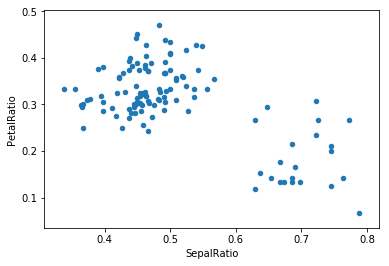

In [29]:
iris.query('SepalLength > 5').assign(SepalRatio = lambda x: x.SepalWidth/x.SepalLength ,
                                    PetalRatio = lambda x: x.PetalWidth/x.PetalLength).plot(kind='scatter',
                                                                                           x='SepalRatio',
                                                                                           y='PetalRatio')

In [ ]:
#所有表达式首先计算，然后分配。
#因此，您不能引用在同一个调用中分配的另一个列
df.assign(c=lambda x: x['A']+x['B'],
         d=lambda x: x['A']+x['C'])

#上面写法不行 写成下面的形式
df.assign(c=lambda x: x['A']+x['B']).assign(d=lambda x: x['A']+x['C'])

indexing and selection

Operation	Syntax	Result
#Select column	df[col]	Series #只有这一个是查看列的
#Select row by label	df.loc[label]	Series
#Select row by integer location	df.iloc[loc]	Series
#Slice rows	df[5:10]	DataFrame
#Select rows by boolean vector	df[bool_vec]	DataFrame
前三种方式返回的都是series 所以只能查看一行或一列


In [30]:
df

,one,bar,flag,foo,one_trunc
a,1.0,1.0,False,fei,1.0
b,2.0,2.0,False,fei,2.0
c,3.0,3.0,True,fei,NaN
d,NaN,NaN,False,fei,NaN


In [33]:
df['one'].head()

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [37]:
df.loc['a']

one              1
bar              1
flag         False
foo            fei
one_trunc        1
Name: a, dtype: object

In [38]:
df.iloc[1] #下标从0开始

one              2
bar              2
flag         False
foo            fei
one_trunc        2
Name: b, dtype: object

In [40]:
df[0:2] #切片式访问若干行

,one,bar,flag,foo,one_trunc
a,1.0,1.0,False,fei,1.0
b,2.0,2.0,False,fei,2.0


In [42]:
df[df['one']>0]

,one,bar,flag,foo,one_trunc
a,1.0,1.0,False,fei,1.0
b,2.0,2.0,False,fei,2.0
c,3.0,3.0,True,fei,NaN


In [43]:
df

,one,bar,flag,foo,one_trunc
a,1.0,1.0,False,fei,1.0
b,2.0,2.0,False,fei,2.0
c,3.0,3.0,True,fei,NaN
d,NaN,NaN,False,fei,NaN


In [45]:
a=df['one']>0
type(a)

pandas.core.series.Series

dataframe的计算
计算结果有行和列的组合 缺失值使用NaN填充

In [46]:
df = pd.DataFrame(np.random.randn(10,4) , columns=['A','B','C','D'])

In [47]:
df

,A,B,C,D
0,0.325759,-1.990256,-0.038320,-0.560889
1,-0.343415,0.675944,-0.042351,-0.298179
2,0.473939,-0.821651,0.626158,-0.543208
3,-0.478210,0.268854,1.081825,1.390254
4,0.329674,0.748057,0.872727,-0.473020
5,0.818173,1.944100,-1.855706,-0.242432
6,-0.405672,0.546738,-1.538546,-0.275752
7,-1.350671,0.001018,-0.157991,0.572584
8,-2.083131,2.281369,-1.383260,1.283741
9,1.035493,0.442244,0.868222,0.262631


In [48]:
df2=pd.DataFrame(np.random.randn(7,3) , columns=['A','B','C'])

In [49]:
df2

,A,B,C
0,-0.589705,0.935066,2.131448
1,-0.749209,0.042152,-1.679491
2,1.774224,1.040572,0.312289
3,0.541229,-0.051308,-1.471228
4,0.884407,-0.748125,-1.000663
5,-1.574820,2.412756,-0.232515
6,0.060439,-1.515681,0.224710


In [50]:
df+df2

,A,B,C,D
0,-0.263947,-1.055190,2.093128,NaN
1,-1.092624,0.718096,-1.721842,NaN
2,2.248163,0.218921,0.938447,NaN
3,0.063020,0.217546,-0.389403,NaN
4,1.214081,-0.000068,-0.127937,NaN
5,-0.756647,4.356856,-2.088221,NaN
6,-0.345234,-0.968943,-1.313836,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [51]:
df

,A,B,C,D
0,0.325759,-1.990256,-0.038320,-0.560889
1,-0.343415,0.675944,-0.042351,-0.298179
2,0.473939,-0.821651,0.626158,-0.543208
3,-0.478210,0.268854,1.081825,1.390254
4,0.329674,0.748057,0.872727,-0.473020
5,0.818173,1.944100,-1.855706,-0.242432
6,-0.405672,0.546738,-1.538546,-0.275752
7,-1.350671,0.001018,-0.157991,0.572584
8,-2.083131,2.281369,-1.383260,1.283741
9,1.035493,0.442244,0.868222,0.262631


In [55]:
df.iloc[1]

A   -0.343415
B    0.675944
C   -0.042351
D   -0.298179
Name: 1, dtype: float64

In [56]:
df-df.iloc[0]

,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,-0.669174,2.666200,-0.004031,0.262710
2,0.148181,1.168605,0.664479,0.017680
3,-0.803968,2.259110,1.120145,1.951143
4,0.003916,2.738313,0.911047,0.087868
5,0.492415,3.934356,-1.817386,0.318456
6,-0.731431,2.536993,-1.500226,0.285137
7,-1.676429,1.991274,-0.119671,1.133473
8,-2.408889,4.271625,-1.344940,1.844630
9,0.709735,2.432500,0.906542,0.823520


In [2]:
index = pd.date_range('1/1/2000' , periods=8)

In [3]:
index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df=pd.DataFrame(np.random.randn(8,3) , index=index , columns=list('ABC'))

In [5]:
df

,A,B,C
2000-01-01,0.560379,0.793236,-0.776470
2000-01-02,-0.450650,1.926346,-1.336891
2000-01-03,-0.079069,0.270408,-0.369893
2000-01-04,-0.426541,-0.583231,1.021184
2000-01-05,-0.499079,-2.387046,0.011716
2000-01-06,0.513223,-0.510288,-0.175737
2000-01-07,-0.513392,-0.138337,-0.293634
2000-01-08,0.383174,-1.381134,-0.183080


In [61]:
df-df['A']

,2000-01-01 00:00:00,2000-01-02 00:00:00,2000-01-03 00:00:00,2000-01-04 00:00:00,2000-01-05 00:00:00,2000-01-06 00:00:00,2000-01-07 00:00:00,2000-01-08 00:00:00,A,B,C
2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
#上面的已经废弃 使用下面的写法
df.sub(df['A'] , axis=0)

,A,B,C
2000-01-01,0.0,0.099060,-0.766016
2000-01-02,0.0,0.930392,-0.231829
2000-01-03,0.0,-0.452748,-1.059743
2000-01-04,0.0,0.170715,1.623689
2000-01-05,0.0,-0.093242,-0.568790
2000-01-06,0.0,0.218023,1.882052
2000-01-07,0.0,-0.046036,-1.195804
2000-01-08,0.0,1.403162,-0.757766


dataframe与标量运算 作用在所有的元素上

In [63]:
df

,A,B,C
2000-01-01,0.616777,0.715837,-0.149239
2000-01-02,-0.010840,0.919552,-0.242669
2000-01-03,0.670309,0.217561,-0.389434
2000-01-04,-1.220268,-1.049553,0.403421
2000-01-05,0.633414,0.540172,0.064624
2000-01-06,-0.659511,-0.441488,1.222542
2000-01-07,0.560165,0.514129,-0.635639
2000-01-08,-0.017242,1.385920,-0.775008


In [64]:
df*5+2

,A,B,C
2000-01-01,5.083885,5.579187,1.253805
2000-01-02,1.945800,6.597762,0.786656
2000-01-03,5.351546,3.087806,0.052832
2000-01-04,-4.101339,-3.247765,4.017106
2000-01-05,5.167072,4.700862,2.323121
2000-01-06,-1.297553,-0.207438,8.112709
2000-01-07,4.800825,4.570647,-1.178194
2000-01-08,1.913790,8.929599,-1.875039


In [65]:
1/df

,A,B,C
2000-01-01,1.621331,1.396965,-6.700663
2000-01-02,-92.251737,1.087486,-4.120843
2000-01-03,1.491849,4.596408,-2.567831
2000-01-04,-0.819492,-0.952786,2.478799
2000-01-05,1.578745,1.851261,15.474075
2000-01-06,-1.516276,-2.265069,0.817968
2000-01-07,1.785188,1.945036,-1.573221
2000-01-08,-57.997876,0.721542,-1.290310


In [66]:
df**4

,A,B,C
2000-01-01,1.447148e-01,0.262578,0.000496
2000-01-02,1.380708e-08,0.715000,0.003468
2000-01-03,2.018835e-01,0.002240,0.023000
2000-01-04,2.217280e+00,1.213438,0.026487
2000-01-05,1.609726e-01,0.085139,0.000017
2000-01-06,1.891853e-01,0.037990,2.233854
2000-01-07,9.846089e-02,0.069870,0.163246
2000-01-08,8.837952e-08,3.689372,0.360765


In [67]:
#还可以存储布尔类型 从而进行逻辑运算

In [68]:
df1 = pd.DataFrame({'a':[1,0,1] , 'b':[0,1,1]} , dtype=bool)
df2 = pd.DataFrame({'a':[0,1,1] , 'b':[1,1,0]} , dtype=bool)



In [69]:
df1

,a,b
0,True,False
1,False,True
2,True,True


In [70]:
df1 & df2

,a,b
0,False,False
1,False,True
2,True,False


In [73]:
False ^ False

False

In [74]:
~df1

,a,b
0,False,True
1,True,False
2,False,False


In [76]:
-df1#~ - 两个符号都是取反运算

,a,b
0,False,True
1,True,False
2,False,False


In [6]:
#转置操作

In [7]:
df

,A,B,C
2000-01-01,0.560379,0.793236,-0.776470
2000-01-02,-0.450650,1.926346,-1.336891
2000-01-03,-0.079069,0.270408,-0.369893
2000-01-04,-0.426541,-0.583231,1.021184
2000-01-05,-0.499079,-2.387046,0.011716
2000-01-06,0.513223,-0.510288,-0.175737
2000-01-07,-0.513392,-0.138337,-0.293634
2000-01-08,0.383174,-1.381134,-0.183080


In [8]:
df.T

,2000-01-01 00:00:00,2000-01-02 00:00:00,2000-01-03 00:00:00,2000-01-04 00:00:00,2000-01-05 00:00:00,2000-01-06 00:00:00,2000-01-07 00:00:00,2000-01-08 00:00:00
A,0.560379,-0.450650,-0.079069,-0.426541,-0.499079,0.513223,-0.513392,0.383174
B,0.793236,1.926346,0.270408,-0.583231,-2.387046,-0.510288,-0.138337,-1.381134
C,-0.776470,-1.336891,-0.369893,1.021184,0.011716,-0.175737,-0.293634,-0.183080


In [10]:
df[:5].T

,2000-01-01 00:00:00,2000-01-02 00:00:00,2000-01-03 00:00:00,2000-01-04 00:00:00,2000-01-05 00:00:00
A,0.560379,-0.450650,-0.079069,-0.426541,-0.499079
B,0.793236,1.926346,0.270408,-0.583231,-2.387046
C,-0.776470,-1.336891,-0.369893,1.021184,0.011716


In [11]:
#dataframe可以使用numpy的函数作用

In [12]:
np.exp(df)

,A,B,C
2000-01-01,1.751336,2.210538,0.460027
2000-01-02,0.637214,6.864385,0.262661
2000-01-03,0.923976,1.310499,0.690808
2000-01-04,0.652763,0.558092,2.776481
2000-01-05,0.607090,0.091901,1.011784
2000-01-06,1.670667,0.600323,0.838838
2000-01-07,0.598462,0.870805,0.745549
2000-01-08,1.466933,0.251293,0.832702


In [13]:
np.asarray(df)

array([[ 0.56037891,  0.79323606, -0.77646958],
       [-0.45064953,  1.92634644, -1.33689063],
       [-0.07906916,  0.27040781, -0.36989325],
       [-0.42654069, -0.58323137,  1.02118424],
       [-0.49907896, -2.38704563,  0.01171559],
       [ 0.51322286, -0.5102878 , -0.17573719],
       [-0.51339152, -0.13833701, -0.29363423],
       [ 0.38317391, -1.38113435, -0.18307982]])

In [15]:
df.T.dot(df) #矩阵乘法

,A,B,C
A,1.628169,0.275036,-0.254419
B,0.275036,12.638363,-3.531658
C,-0.254419,-3.531658,3.720580


In [16]:
np.dot(df.T , df)

array([[  1.62816902,   0.27503593,  -0.25441896],
       [  0.27503593,  12.63836298,  -3.53165768],
       [ -0.25441896,  -3.53165768,   3.72057995]])

In [17]:
s1 = pd.Series(np.arange(5,10))

In [19]:
s1.dot(s1)

255

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8 entries, 2000-01-01 to 2000-01-08
Freq: D
Data columns (total 3 columns):
A    8 non-null float64
B    8 non-null float64
C    8 non-null float64
dtypes: float64(3)
memory usage: 576.0 bytes


In [31]:
print(df.to_string())

                   A         B         C
2000-01-01  0.560379  0.793236 -0.776470
2000-01-02 -0.450650  1.926346 -1.336891
2000-01-03 -0.079069  0.270408 -0.369893
2000-01-04 -0.426541 -0.583231  1.021184
2000-01-05 -0.499079 -2.387046  0.011716
2000-01-06  0.513223 -0.510288 -0.175737
2000-01-07 -0.513392 -0.138337 -0.293634
2000-01-08  0.383174 -1.381134 -0.183080


In [32]:
pd.set_option('display.width' , 40) #修改显示宽度 默认是80

In [33]:
df = pd.DataFrame({'foo1':np.random.randn(5),
                  'foo2':np.random.randn(5)})

In [34]:
df

,foo1,foo2
0,-1.331155,0.004754
1,1.299578,0.893102
2,0.234655,-0.736702
3,0.065715,0.339209
4,-0.664622,-0.205777


In [38]:
df.foo1 #这种访问方式比较好 series类型

0   -1.331155
1    1.299578
2    0.234655
3    0.065715
4   -0.664622
Name: foo1, dtype: float64

In [37]:
type(df.foo1)

pandas.core.series.Series

In [ ]:
#ended 2018.1.24